In [1]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from util import*
from tensorflow.keras import layers, Model


In [2]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [3]:
# Specify the path to download data
download_path = os.getcwd() + "/dataset/"
print(download_path)

/Users/zhenglyu/Desktop/Research/course/cme216/course_project/cme-216-housing-pricing-prediction/dataset/


In [4]:
ds = download_skl_dataset(download_path)

In [5]:
data, target, feature_names, DESCR = data_process(ds)

In [6]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=True)

In [7]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state=100)

In [47]:
# Create the model class
model = nn_model(data, target)

# Build model
# neuron_list = [256, 256, 128, 128, 64, 32, 16, 8, 4]
neuron_list = [128, 128, 128, 128, 64, 32, 16, 8, 4]
model.build_model(neuron_list, reg_factor=5e-6)

# Compile model
model.compile_model(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3))

# Compile model
# model.compile_model(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),
#                     loss = tf.keras.losses.MeanAbsolutePercentageError(),
#                     metrics = [tf.keras.metrics.MeanAbsolutePercentageError()])

In [48]:
# Specify the checkpoint path
cur_path = os.getcwd()
ckpt_path = cur_path + '/checkpoint/log_data/network_log.ckpt'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_path,
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

In [49]:
# Training only. SKIP THIS WHEN LOADING MODEL
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Train the model
model.train(x_train, y_train, x_val, y_val, batch_size=10, epochs=30, callbacks=[lr_scheduler, model_checkpoint_callback])

Train on 13209 samples, validate on 3303 samples
Epoch 1/30
13209/13209 [==============================] - 3s 209us/sample - loss: 0.7096 - mse: 0.7032 - val_loss: 0.4058 - val_mse: 0.3994
Epoch 2/30
13209/13209 [==============================] - 2s 165us/sample - loss: 0.3942 - mse: 0.3878 - val_loss: 0.4039 - val_mse: 0.3974
Epoch 3/30
13209/13209 [==============================] - 2s 162us/sample - loss: 0.3681 - mse: 0.3615 - val_loss: 0.3602 - val_mse: 0.3535
Epoch 4/30
13209/13209 [==============================] - 2s 161us/sample - loss: 0.2994 - mse: 0.2927 - val_loss: 0.3167 - val_mse: 0.3100
Epoch 5/30
13209/13209 [==============================] - 2s 158us/sample - loss: 0.2797 - mse: 0.2730 - val_loss: 0.3028 - val_mse: 0.2961
Epoch 6/30
13209/13209 [==============================] - 2s 157us/sample - loss: 0.2697 - mse: 0.2630 - val_loss: 0.2974 - val_mse: 0.2907
Epoch 7/30
13209/13209 [==============================] - 2s 161us/sample - loss: 0.2622 - mse: 0.2555 - val_lo

In [50]:
# Load model
model.load(ckpt_path)

In [51]:
y_pred = model.test(x_test, y_test)

In [52]:
mse = np.mean(((y_pred.T - y_test)**2))
print(mse)

0.2511388947447661


## Visualize the result

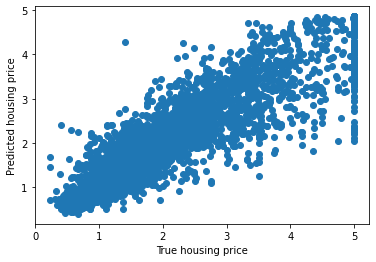

In [53]:
plot_pred_true(x_test, y_test, y_pred)

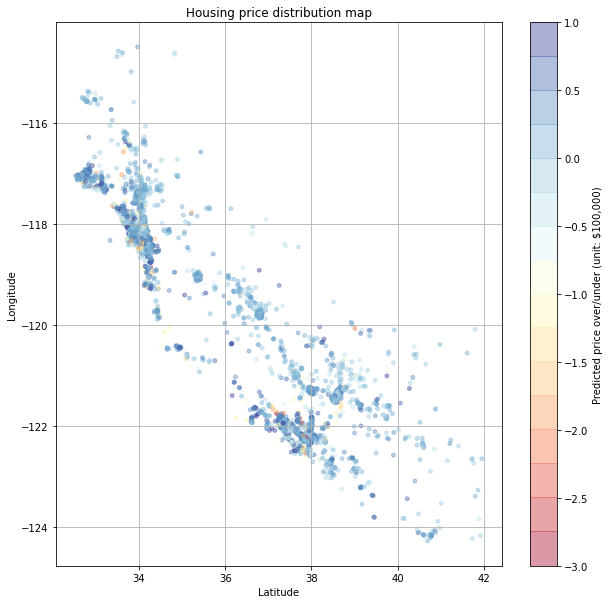

In [54]:
# Plot land map mse
save_path = cur_path + '/figures/network_log_data_train_mse_test_mse.png'
land_map(x_test*std_data + mean_data, (y_pred.T - y_test), save_path=save_path, bar_label='Predicted price over/under (unit: $100,000)', clim=[-3, 1], step=16)

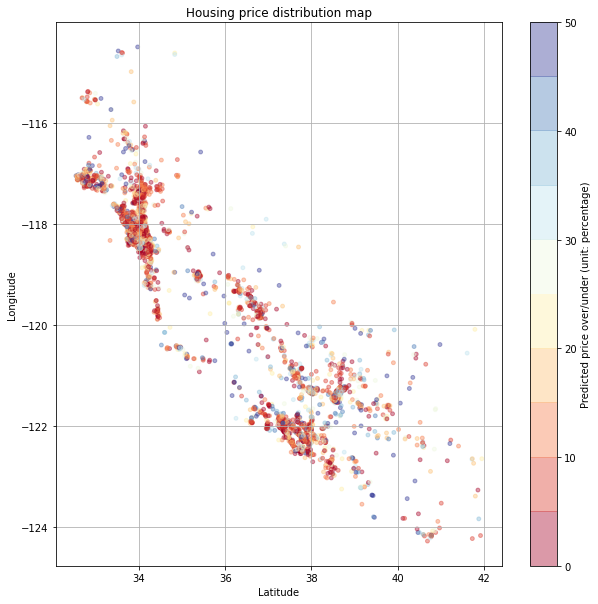

In [58]:
# Plot land map mape
save_path = cur_path + '/figures/network_log_data_train_mse_test_mape.png'
land_map(x_test*std_data + mean_data, np.abs(y_pred.T - y_test)/y_test*100, save_path=save_path, bar_label='Predicted price over/under (unit: percentage)', clim=[0, 50], step=10)

In [56]:
tmp = np.mean(np.abs((y_pred.T - y_test)/y_test*100))
print(tmp)

18.66365798081665
